In [6]:
import geopandas as gpd
import folium

# Load the GeoPackage file, specifying the 'buurten' layer
file_path = 'wijkenbuurten_2024_v1.gpkg'  # Update this with the correct path
neighborhoods = gpd.read_file(file_path, layer='buurten')
neighborhoods_df = neighborhoods[['buurtnaam', 'buurtcode', 'geometry']]

# Check the first few rows of the GeoDataFrame
print(neighborhoods_df.head())

           buurtnaam   buurtcode  \
0         Buitenland  BU09989999   
1  Groot binnenwater  BU00349997   
2  Groot binnenwater  BU00509997   
3        Buitenwater  BU00609998   
4        Buitenwater  BU00729998   

                                            geometry  
0  MULTIPOLYGON (((123629.78 379674.57, 123627.21...  
1  MULTIPOLYGON (((150087.299 479382.379, 150000....  
2  MULTIPOLYGON (((155047.32 474836.246, 155049.0...  
3  MULTIPOLYGON (((196000 608000, 195250 607500, ...  
4  MULTIPOLYGON (((158000 581000, 158331.38 58046...  


In [7]:
print(len(neighborhoods_df))

14668


In [15]:
# Create a new DataFrame with only the buurtnaam, buurtcode, and geometry
neighborhoods_df = neighborhoods[['buurtnaam', 'buurtcode', 'geometry']]

# Create a Folium map centered around the Netherlands
m = folium.Map(location=[52.3784, 4.9009], zoom_start=8)  # Center on Amsterdam

# Add the neighborhoods to the map
folium.GeoJson(
    neighborhoods_df,
    name='Neighborhoods',
    tooltip=folium.GeoJsonTooltip(fields=['buurtnaam', 'buurtcode'], aliases=['Neighborhood:', 'Code:'])
).add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('neighborhoods_map.html')

# Display the map in a Jupyter Notebook (if using Jupyter)
# m

In [2]:
# Mapping of display names to actual column names
variable_mapping = {
    "WOZ Value (2023), and increase from 2014 until 2023 (%)": "woz_2023", 
    "WOZ Value (2024)": "woz_2024",
    "WOZ Value (2025)": "woz_2025",        
    "WOZ Value (2026)": "woz_2026",
    "WOZ Increase from 2014 until 2023 (%)": "act_woz_incr"
}

# Simulate a selection using input() instead of Streamlit
print("Choose a variable to display:")
for i, key in enumerate(variable_mapping.keys()):
    print(f"{i + 1}. {key}")

# Ask for user input
selected_index = int(input("Enter the number of your choice: ")) - 1
selected_display_name = list(variable_mapping.keys())[selected_index]
selected_variable = variable_mapping[selected_display_name]

# Print results to verify
print(f"\nSelected display name: {selected_display_name}")
print(f"Mapped column name: {selected_variable}")

if selected_variable == "woz_2023":
    selected_variables =  ["woz_2023", "woz/m2_23", "act_woz_incr"]

print(selected_variables)


Choose a variable to display:
1. WOZ Value (2023), and increase from 2014 until 2023 (%)
2. WOZ Value (2024)
3. WOZ Value (2025)
4. WOZ Value (2026)
5. WOZ Increase from 2014 until 2023 (%)


Enter the number of your choice:  1



Selected display name: WOZ Value (2023), and increase from 2014 until 2023 (%)
Mapped column name: woz_2023
['woz_2023', 'woz/m2_23', 'act_woz_incr']


### Get only desired columns

In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import pydeck as pdk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

file = pd.read_csv('cbs_Predicted.csv')

file_path = 'wijkenbuurten_2024_v1.gpkg'  # Update this with the correct path
neighborhoods = gpd.read_file(file_path, layer='buurten')


In [2]:
from shapely.geometry import Polygon


CBS_buurten = file['gwb_code']

filtered_neighborhoods = neighborhoods[neighborhoods["buurtcode"].isin(CBS_buurten)]
filtered_neighborhoods = filtered_neighborhoods[["buurtcode", "geometry"]]

filtered_neighborhoods["geometry"] = filtered_neighborhoods["geometry"].apply(
    lambda geom: geom if isinstance(geom, Polygon) else list(geom.geoms)[0]  # Take first polygon
)

# # For CBS
# json_data = filtered_neighborhoods.to_crs(epsg=4326).to_json()

# with open("polygons_neigborhoods_CBS.json", "w") as f:
#     f.write(json_data)


In [3]:
# For Utrecht
Utrecht_buurten = file[file["gm_naam"] == "Utrecht"]
utrecht_neighborhoods = filtered_neighborhoods[filtered_neighborhoods["buurtcode"].isin(Utrecht_buurten["gwb_code"])]
json_utrecht = utrecht_neighborhoods.to_crs(epsg=4326).to_json()

with open("polygons_neigborhoods_Utrecht.json", "w") as f:
    f.write(json_utrecht)


In [3]:
selected_columns = ['regio', 'gm_naam', 'gwb_code', 'a_inw', 'bev_dich', 'a_woning', 'p_koopw',
       'p_huurw', 'p_wcorpw', 'g_ele', 'g_ele_vw', 'g_ele_hu',
       'g_ele_ko', 'g_gas', 'g_gas_ko', 'g_ink_po', 'g_ink_pi', 'p_hh_li', 'p_hh_hi',
       'p_hh_lkk', 'a_soz_ww', 'a_soz_ow', 'g_pau_hh', 'pst_mvp', 'pst_dekp', 'ste_oad', 
        'woz_2014', 'woz_2015', 'woz_2016', 'woz_2017',
       'woz_2018', 'woz_2019', 'woz_2020', 'woz_2021', 'woz_2022', 'woz_2023',
       'woz_2024', 'woz_2025', 'woz_2026']


important_CBS = file[selected_columns]

important_B = important_CBS.copy()
# Ronden en omzetten naar int voor beide kolommen
important_B['woz_2025'] = important_B['woz_2025'].round(0).astype(int)
important_B['woz_2026'] = important_B['woz_2026'].round(0).astype(int)


In [4]:
#print(important_B)
buurtdata = important_B.rename(columns={'gwb_code': 'buurtcode'}) 
print(buurtdata)
#important_B.to_csv('buurten_map.csv', index=False)

                      regio        gm_naam   buurtcode   a_inw  bev_dich  \
0             Belgisch Park  's-Gravenhage  BU05180271  8385.0    7900.0   
1             Westbroekpark  's-Gravenhage  BU05180373  1090.0    2644.0   
2                 Duttendel  's-Gravenhage  BU05180374  1310.0    1006.0   
3               Nassaubuurt  's-Gravenhage  BU05180448  1635.0    5779.0   
4                 Uilennest  's-Gravenhage  BU05180475  2335.0    7935.0   
...                     ...            ...         ...     ...       ...   
4709            Gerenlanden         Zwolle  BU01935140  3000.0    5434.0   
4710             Gerenbroek         Zwolle  BU01935150  3025.0    6411.0   
4711              Oude Mars         Zwolle  BU01935160   270.0     625.0   
4712             Windesheim         Zwolle  BU01935200   390.0     730.0   
4713  Harculo en Hoogzutmen         Zwolle  BU01935210   495.0      47.0   

      a_woning  p_koopw  p_huurw  p_wcorpw        g_ele  ...    woz_2017  \
0       415

In [19]:
print(json_data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [15]:
import json

def merge_data_to_geojson(data, json_poly_buurt):
    """
    Merges DataFrame (data) with GeoJSON (json_poly_buurt) using 'buurtcode' as the key.
    """

    print(type(json_poly_buurt))  # Should be <class 'dict'>
    print(json_poly_buurt.keys())  # Should contain "features"
    print(json_poly_buurt.get("features", "Missing key"))  # Check if "features" exists

    # Convert DataFrame to a dictionary for fast lookup (each 'buurtcode' contains a dictionary of all values)
    data_dict = data.set_index("buurtcode")[[
        "regio", "gm_naam", "a_inw", "bev_dich", "a_woning", "p_koopw",
        "p_huurw", "p_wcorpw", "g_ele", "g_ele_vw", "g_ele_hu", "g_ele_ko", "g_gas",
        "g_gas_ko", "g_ink_po", "g_ink_pi", "p_hh_li", "p_hh_hi", "p_hh_lkk", 
        "a_soz_ww", "a_soz_ow", "g_pau_hh", "pst_mvp", "pst_dekp", "ste_oad",
        "woz_2014", "woz_2015", "woz_2016", "woz_2017", "woz_2018", "woz_2019", 
        "woz_2020", "woz_2021", "woz_2022", "woz_2023", "woz_2024", "woz_2025", "woz_2026"
    ]].to_dict(orient="index")  # Converts to a nested dictionary {buurtcode: {column_name: value, ...}}

    # Loop through each feature in the GeoJSON and add relevant data
    for feature in json_poly_buurt["features"]:
        buurtcode = feature["properties"].get("buurtcode", None)
        
        if buurtcode in data_dict:
            # Add all columns from `data_dict` to `feature["properties"]`
            feature["properties"].update(data_dict[buurtcode])
        else:
            # Set default values for missing buurtcodes
            for key in data.columns:
                feature["properties"][key] = None  

    return json_poly_buurt  # Return the updated GeoJSON


json_pydeck = merge_data_to_geojson(buurtdata, json_data)

<class 'str'>


AttributeError: 'str' object has no attribute 'keys'

In [4]:
import pandas as pd
import json

# Load the buurtdata CSV file
buurtdata_path = "buurten_map.csv"  # Update the path if necessary
df = pd.read_csv(buurtdata_path)

# Load the filtered neighborhoods JSON file
filtered_neighborhoods_path = "polygons_neigborhoods_CBS.json"  # Update the path if necessary
with open(filtered_neighborhoods_path, "r") as json_file:
    filtered_neighborhoods_data = json.load(json_file)

# Convert the JSON structure into a DataFrame for merging
neighborhoods_list = []
for feature in filtered_neighborhoods_data["features"]:
    properties = feature["properties"]
    properties["geometry"] = feature["geometry"]  # Add geometry separately
    neighborhoods_list.append(properties)

# Convert to DataFrame
filtered_neighborhoods_df = pd.DataFrame(neighborhoods_list)

# Ensure column consistency for merging
buurtdata = buurtdata.rename(columns={'gwb_code': 'buurtcode'})

# Merge the data on 'buurtcode'
merged_data = filtered_neighborhoods_df.merge(buurtdata, on="buurtcode", how="left")

# Convert merged data back to GeoJSON format
merged_geojson = {
    "type": "FeatureCollection",
    "features": []
}

for _, row in merged_data.iterrows():
    properties = {col: row[col] for col in merged_data.columns if col != "geometry"}
    feature = {
        "type": "Feature",
        "properties": properties,
        "geometry": row["geometry"]
    }
    merged_geojson["features"].append(feature)

# Save the updated GeoJSON file
output_file_path = "merged_neighborhoods.json"  # Update the path if needed
with open(output_file_path, "w") as json_file:
    json.dump(merged_geojson, json_file)

print(f"Merged GeoJSON file saved as: {output_file_path}")


Merged GeoJSON file saved as: merged_neighborhoods.json


In [5]:

def finalized_df_map(df):
    # Calculate percentage increases
    df["act_woz_incr"] = (((df["woz_2024"] - df["woz_2014"]) / df["woz_2014"]) * 100).round(2)
    df["pred_change_25"] = (((df["woz_2025"] - df["woz_2024"]) / df["woz_2024"]) * 100).round(2)
    df["pred_change_26"] = (((df["woz_2026"] - df["woz_2025"]) / df["woz_2025"]) * 100).round(2)

    return df

ad_26_df = df.copy()
final_df = finalized_df_map(ad_26_df)

In [6]:
select_more_variables = ["regio", "gm_naam", "gwb_code", "a_inw", "bev_dich", "p_wcorpw", 
        "g_ele", "g_gas", "g_ink_po", "g_ink_pi", "p_hh_hi", "a_soz_ww", "pst_mvp", "pst_dekp", "ste_oad",
        "woz_2023", "woz_2024", "woz_2025", "woz_2026", "act_woz_incr", "pred_change_25", "pred_change_26"]

In [7]:
ffdf = final_df[select_more_variables]

In [8]:
ffdf.to_csv('NL_map.csv', index=False)

In [9]:
ffdfU = ffdf[ffdf["gm_naam"] == "Utrecht"]

In [10]:
ffdfU.to_csv('buurt_U_map.csv', index=False)

In [16]:
import pandas as pd

df_buurt = pd.read_csv('buurten_map.csv')
df_utrecht = pd.read_csv('utrecht_map.csv')

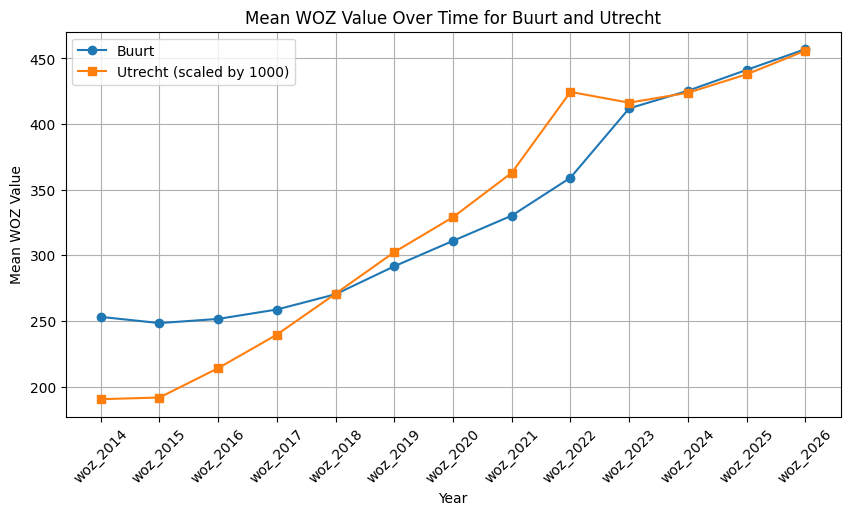

In [13]:


import pandas as pd
import matplotlib.pyplot as plt


woz_columns = ["woz_2014", "woz_2015", "woz_2016", "woz_2017", "woz_2018", "woz_2019", 
               "woz_2020", "woz_2021", "woz_2022", "woz_2023", "woz_2024", "woz_2025", "woz_2026"]

# Compute mean for each year
mean_buurt = df_buurt[woz_columns].mean()
mean_utrecht = df_utrecht[woz_columns].mean() / 1000  # Scale Utrecht data

# Plot
plt.figure(figsize=(10, 5))
plt.plot(woz_columns, mean_buurt, marker='o', label='Neigbourhoods (CBS)')
plt.plot(woz_columns, mean_utrecht, marker='s', label='Utrecht (WOZ)')

plt.xlabel('Year')
plt.ylabel('Mean WOZ Value (x 1000)')
plt.title('Mean WOZ Value Over Time for Neigbourhoods in the Netherlands and Invidiual Properties in Utrecht')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

save_path = os.path.join(os.getcwd(), "meanforecast.png")
plt.savefig(save_path, dpi=300)

# Show plot
plt.show()

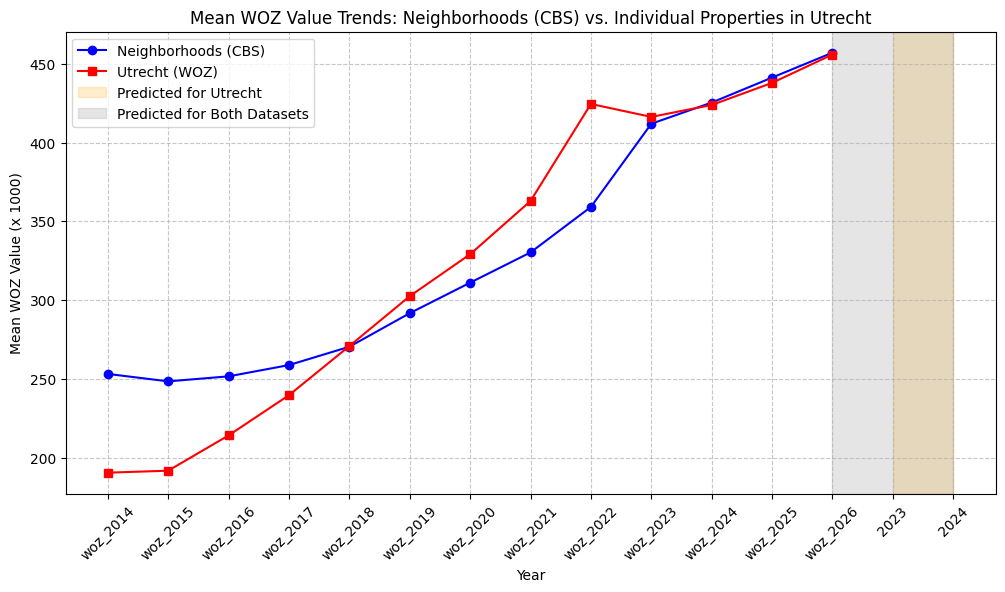

In [17]:
# Improved title
title = "Mean WOZ Value Trends: Neighborhoods (CBS) vs. Individual Properties in Utrecht"

# Define prediction cutoff years
prediction_start_utrecht = "2023"
prediction_start_both = "2024"

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(woz_columns, mean_buurt, marker='o', label='Neighborhoods (CBS)', color='blue')
plt.plot(woz_columns, mean_utrecht, marker='s', label='Utrecht (WOZ)', color='red')

# Highlight predicted years
plt.axvspan(prediction_start_utrecht, prediction_start_both, color='orange', alpha=0.2, label='Predicted for Utrecht')
plt.axvspan(prediction_start_both, woz_columns[-1], color='gray', alpha=0.2, label='Predicted for Both Datasets')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Mean WOZ Value (x 1000)')
plt.title(title)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


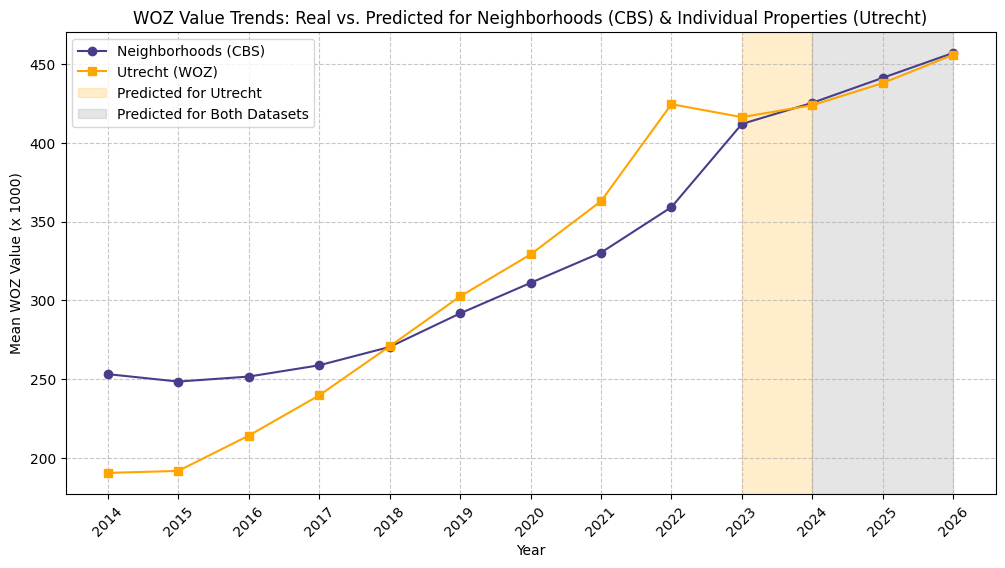

In [20]:
import os
# Define relevant columns
woz_columns = ["woz_2014", "woz_2015", "woz_2016", "woz_2017", "woz_2018", "woz_2019", 
               "woz_2020", "woz_2021", "woz_2022", "woz_2023", "woz_2024", "woz_2025", "woz_2026"]

# Compute mean for each year
mean_buurt = df_buurt[woz_columns].mean()
mean_utrecht = df_utrecht[woz_columns].mean() / 1000  # Scale Utrecht data

# Extract years from column names
years = [col.split("_")[1] for col in woz_columns]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(years, mean_buurt, marker='o', label='Neighborhoods (CBS)', color='darkslateblue')
plt.plot(years, mean_utrecht, marker='s', label='Utrecht (WOZ)', color='orange')

# Highlight predicted years
plt.axvspan("2023", "2024", color='orange', alpha=0.2, label='Predicted for Utrecht')
plt.axvspan("2024", years[-1], color='gray', alpha=0.2, label='Predicted for Both Datasets')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Mean WOZ Value (x 1000)')
plt.title("WOZ Value Trends: Real vs. Predicted for Neighborhoods (CBS) & Individual Properties (Utrecht)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

save_path = os.path.join(os.getcwd(), "meanforecast.png")
plt.savefig(save_path, dpi=300)

# Show plot
plt.show()
